In [10]:
import pickle
import emoji
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer 

In [21]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns

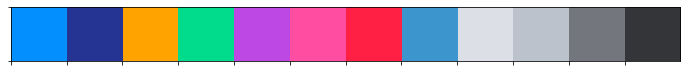

In [23]:
venmo_colors = ["#048FFF", "#253393", "#ffA300", "#00DC8C", "#BD48E4", "#FF4EA2", "#FF2043", "#3d95ce", "#dce0e6","#bcc2cc", "#73777d", "#343538"]
sns.palplot(sns.color_palette(venmo_colors))

### Load data

In [11]:
df = pickle.load(open("Data/clean_df.pickle","rb"))

In [12]:
spaced_notes = pickle.load(open("Data/spaced_notes.pickle","rb"))

### Explore the length of each note

In [14]:
#Need to be specific with token_pattern to capture the emojis
full_vec = CountVectorizer(token_pattern=r'[^\s]+')
full_dtm = full_vec.fit_transform(spaced_notes)
full_dtm_matrix = pd.DataFrame(full_dtm.toarray(), columns=full_vec.get_feature_names())

In [17]:
full_dtm_matrix

"  "'  "adulting  "and  "baby"  "blind"  "bri  "cake  "cheyenne  \
0       0   0          0     0       0        0     0      0          0   
1       0   0          0     0       0        0     0      0          0   
2       0   0          0     0       0        0     0      0          0   
3       0   0          0     0       0        0     0      0          0   
4       0   0          0     0       0        0     0      0          0   
...    ..  ..        ...   ...     ...      ...   ...    ...        ...   
286459  0   0          0     0       0        0     0      0          0   
286460  0   0          0     0       0        0     0      0          0   
286461  0   0          0     0       0        0     0      0          0   
286462  0   0          0     0       0        0     0      0          0   
286463  0   0          0     0       0        0     0      0          0   

        "coco"  ...  🪐  🪑  🪒  🪓  🪔  🪕  🺲ed  🺴ombstone  󠁧󠁢󠁥󠁮󠁧󠁿  󠁧󠁢󠁳󠁣󠁴󠁿  
0            0  ...  0  0  0  0  0  0    0          0       0       0  
1            0  ...  0  0  0  0  0  0    0          0       0       0  
2            0  ...  0  0  0  0  0  0    0          0       0       0  
3            0  ...  0  0  0  0  0  0    0          0       0       0  
4            0  ...  0  0  0  0  0  0    0          0       0       0  
...        ...  ... .. .. .. .. .. ..  ...        ...     ...     ...  
286459       0  ...  0  0  0  0  0  0    0          0       0       0  
286460       0  ...  0  0  0  0  0  0    0          0       0       0  
286461       0  ...  0  0  0  0  0  0    0          0       0       0  
286462       0  ...  0  0  0  0  0  0    0          0       0       0  
286463       0  ...  0  0  0  0  0  0    0          0       0       0  

[286464 rows x 39994 columns]

In [18]:
terms_per_doc = np.sum(full_dtm,axis=1)
emoji_per_doc = [emoji.emoji_count(x) for x in spaced_notes]

In [31]:
total_terms = np.sum(terms_per_doc)
total_emojis = np.sum(emoji_per_doc)
total_words = total_terms-total_emojis

words_share = total_words/total_terms
emojis_share = total_emojis/total_terms

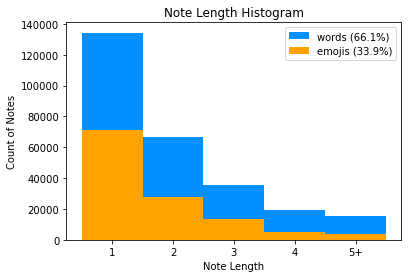

In [35]:
p1 = plt.hist(terms_per_doc,[1,2,3,4,5,6],align='mid',color="#048FFF")
p2 = plt.hist(emoji_per_doc,[1,2,3,4,5,6],align='mid',color="#ffA300")

plt.ylabel('Count of Notes')
plt.xlabel('Note Length')
plt.title('Note Length Histogram')
plt.legend([f'words ({words_share*100:.1f}%)', f'emojis ({emojis_share*100:.1f}%)'])

plt.xticks(ticks=[1.5,2.5,3.5,4.5,5.5], labels=[1,2,3,4,'5+'])

plt.savefig('images/Note_Length.png')
plt.show();

The vast majority of notes are really short, consisting of one word or one emoji.

Venmo requires a non-empty note for each transaction. The data suggests that many go for the bare minimum.

This makes NLP more difficult because we cannot use traditional NLP techniques use the context of words to derive associations (when a note/document only has one word, then theres no context!)

Additionally, there may be many "junk" notes of a single letter, or throwaway comment. So any understanding that we can determine will be on a limited portion of the data...



## Now to look for popular words/emojis

Note that we will remove uncommon words to make the data more manageable

In [9]:
vectorizer = CountVectorizer(token_pattern=r'[^\s]+',stop_words='english',min_df=200)
dtm = vectorizer.fit_transform(spaced_notes)
dtm_matrix = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names()).transpose()

In [63]:
counts=np.sum(dtm_matrix.transpose(),axis=0)
len(counts)

443

In [64]:
np.sum(counts[np.argsort(counts)[::-1]])

304025

In [65]:
counts.sort_values(ascending=False)

food       6978
️          6531
🍕          5813
💸          5681
‍          5469
           ... 
january     207
today       206
present     204
return      203
target      200
Length: 443, dtype: int64

In [167]:
word_count_df = pd.DataFrame(zip(list(dtm_matrix.index),counts),columns=['word','count'])
word_count_df['defined'] = [emoji.demojize(x) for x in word_count_df.word]
word_count_df['emoji'] = [emoji.emoji_count(x) for x in word_count_df.word]

In [169]:
word_count_df[word_count_df.emoji==1].sort_values(by='count',ascending=False)[0:60]

word  count                           defined  emoji
270    🍕   5813                           :pizza:      1
384    💸   5681                :money_with_wings:      1
245    ❤   4640                       :red_heart:      1
328    🏻   4367                 :light_skin_tone:      1
329    🏼   4178          :medium_light_skin_tone:      1
325    🏠   3995                           :house:      1
255    🌮   3053                            :taco:      1
232    ♀   2901                     :female_sign:      1
300    🎁   2669                    :wrapped_gift:      1
306    🎉   2599                    :party_popper:      1
230    ☕   2456                    :hot_beverage:      1
294    🍺   2311                        :beer_mug:      1
320    🏈   2163               :american_football:      1
392    🔥   2123                            :fire:      1
291    🍷   2091                      :wine_glass:      1
402    😘   2076             :face_blowing_a_kiss:      1
269    🍔   2034                       :hamburger:      1
240    ⛽   2023                       :fuel_pump:      1
295    🍻   1924              :clinking_beer_mugs:      1
330    🏽   1800                :medium_skin_tone:      1
289    🍴   1760                  :fork_and_knife:      1
383    💵   1667                 :dollar_banknote:      1
293    🍹   1662                  :tropical_drink:      1
410    🚗   1652                      :automobile:      1
376    💦   1497                  :sweat_droplets:      1
388    📱   1478                    :mobile_phone:      1
272    🍗   1465                     :poultry_leg:      1
355    👶   1458                            :baby:      1
233    ♂   1436                       :male_sign:      1
283    🍪   1391                          :cookie:      1
279    🍣   1377                           :sushi:      1
390    🔌   1327                   :electric_plug:      1
278    🍟   1326                    :french_fries:      1
367    💕   1287                      :two_hearts:      1
362    💇   1275          :person_getting_haircut:      1
256    🌯   1256                         :burrito:      1
298    🍾   1224        :bottle_with_popping_cork:      1
337    🐶   1183                        :dog_face:      1
288    🍳   1156                         :cooking:      1
301    🎂   1155                   :birthday_cake:      1
358    💃   1074                   :woman_dancing:      1
235    ⚡   1071                    :high_voltage:      1
344    👕   1068                         :t-shirt:      1
263    🍆   1029                        :eggplant:      1
317    🏀   1007                      :basketball:      1
374    💡    999                      :light_bulb:      1
333    🐔    995                         :chicken:      1
326    🏡    991               :house_with_garden:      1
275    🍜    989                   :steaming_bowl:      1
381    💰    986                       :money_bag:      1
238    ⛳    967                    :flag_in_hole:      1
277    🍞    943                           :bread:      1
439    🥰    920      :smiling_face_with_3_hearts:      1
398    😊    914  :smiling_face_with_smiling_eyes:      1
303    🎄    906                  :Christmas_tree:      1
360    💅    900                     :nail_polish:      1
408    🙏    867                    :folded_hands:      1
425    🥂    857                :clinking_glasses:      1
342    👍    825                       :thumbs_up:      1
241    ✈    822                        :airplane:      1

Pizza is the most popular emoji! This corresponds with other analysis of venmo transacations that indicates the popularity of pizza emoji (and publicized by venmo).